In [3]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time;  from datetime import datetime

In [4]:
plt.rcParams["figure.figsize"] = (15,10)

In [5]:
nyc = pd.read_csv('gapi_city_data-export-2017-11-30.csv') # read the gapi database
nyc.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN
nyc.drop("Organic Searches", axis=1,inplace=True) # Drops Column
nyc = nyc.loc[nyc['City'] == 1023191] # Selects records only NYC

In [7]:
weather = pd.read_csv('open_weather_6cities.csv')  # read the weather database
weather.dropna(axis=1, how='all', inplace=True) # drops all columns where all values are NaN
weather = weather.loc[weather['city_id'] == 5128581] # Selects records only NYC

In [8]:
# takes a string  in YYYMMDDHH (nyc(Date Hour)) and returns a Unix Time assuming local time zone for input
# this works because (local time on my machine) == (timezone of ga: time{set by ga account preferences}) 
def unixtimestamp(row):
    return int(int(time.mktime(datetime.strptime(row, "%Y%m%d%H").timetuple())))

In [9]:
# creates new column unix_time in nyc using unixtimestamp
nyc['unix_time'] = nyc.apply(lambda row: unixtimestamp(str(row['Date Hour'])), axis=1)

In [10]:
# join nyc to weather on unix_time 
df = nyc.join(weather.set_index('dt'), on='unix_time') 

### The above creates 13k rows with NaNs in weather columns which is because they arent in weather
  Fix - automate weather data collection based on Gapi input

In [11]:
# fix to drop rows where no weather data
df = df.dropna(subset=['temp'])

In [23]:
df2 = df[["User Type",'Sessions','Transactions', 'Revenue Per User','temp','weather_id']]

In [34]:
df2 = df.drop(df[df['User Type'] == "Returning Visitor"].index)

In [ ]:
df

In [25]:
df2

City   Date Hour    User Type Device Category  Sessions  Bounces  \
5882     1023191  2017070200  New Visitor          mobile         3        0   
5883     1023191  2017070200  New Visitor          tablet         1        1   
5885     1023191  2017070201  New Visitor          mobile         5        3   
5887     1023191  2017070202  New Visitor          mobile         4        2   
5887     1023191  2017070202  New Visitor          mobile         4        2   
5903     1023191  2017070207  New Visitor         desktop         2        1   
5904     1023191  2017070207  New Visitor          mobile         5        2   
5905     1023191  2017070207  New Visitor          tablet         3        1   
5908     1023191  2017070208  New Visitor         desktop         4        2   
5909     1023191  2017070208  New Visitor          mobile         4        2   
5910     1023191  2017070208  New Visitor          tablet         2        0   
5912     1023191  2017070209  New Visitor         desktop         2        1   
5913     1023191  2017070209  New Visitor          mobile        11        4   
5914     1023191  2017070209  New Visitor          tablet         0        0   
5916     1023191  2017070210  New Visitor         desktop         5        4   
5917     1023191  2017070210  New Visitor          mobile         2        0   
5919     1023191  2017070211  New Visitor         desktop         1        1   
5920     1023191  2017070211  New Visitor          mobile         8        7   
5921     1023191  2017070211  New Visitor          tablet         2        0   
5923     1023191  2017070212  New Visitor         desktop         4        1   
5924     1023191  2017070212  New Visitor          mobile         9        2   
5925     1023191  2017070212  New Visitor          tablet         1        0   
5928     1023191  2017070213  New Visitor         desktop         2        1   
5929     1023191  2017070213  New Visitor          mobile        11        6   
5930     1023191  2017070213  New Visitor          tablet         1        0   
5933     1023191  2017070214  New Visitor         desktop         3        0   
5934     1023191  2017070214  New Visitor          mobile        13        5   
5935     1023191  2017070214  New Visitor          tablet         1        0   
5939     1023191  2017070215  New Visitor         desktop         1        1   
5940     1023191  2017070215  New Visitor          mobile         5        3   
...          ...         ...          ...             ...       ...      ...   
5226740  1023191  2017071512  New Visitor          mobile        11        5   
5226742  1023191  2017071513  New Visitor         desktop         3        1   
5226743  1023191  2017071513  New Visitor          mobile        11        5   
5226744  1023191  2017071513  New Visitor          tablet         1        0   
5226747  1023191  2017071514  New Visitor         desktop         6        2   
5226748  1023191  2017071514  New Visitor          mobile        19       11   
5226749  1023191  2017071514  New Visitor          tablet         2        1   
5226753  1023191  2017071515  New Visitor         desktop         2        0   
5226754  1023191  2017071515  New Visitor          mobile        13        5   
5226755  1023191  2017071515  New Visitor          tablet         2        1   
5226758  1023191  2017071516  New Visitor         desktop         3        1   
5226759  1023191  2017071516  New Visitor          mobile        12        4   
5226760  1023191  2017071516  New Visitor          tablet         3        2   
5226762  1023191  2017071517  New Visitor         desktop         1        0   
5226763  1023191  2017071517  New Visitor          mobile         8        4   
5226764  1023191  2017071517  New Visitor          tablet         3        2   
5226767  1023191  2017071518  New Visitor         desktop         2        0   
5226768  1023191  2017071518  New Visitor          mobile        15        7   
5226769  102

In [26]:
def return_first_digit(row): # takes an int, returns first character as a string
    return (str(row)[0])
# remove all but the first unit of weather_id int
df2['weather_id'] = df2.loc[:,('weather_id')].apply(return_first_digit)

/home/dj/programming/data_env/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
df3 = df2.drop(['Sessions','Transactions'],axis=1)

In [28]:
weather_id_dict = {'2':'2 Thunderstorms','3':'3 Drizzle','5':'5 Rain','6':'6 Snow','7':'7 Atmosphere','8':'8 Clear','9':'9 Extreme'}

In [29]:
df3 = df3.replace({'weather_id':weather_id_dict}) 

In [30]:
df4 = df3.pivot_table(index='User Type', columns='weather_id',values='Revenue Per User', aggfunc=np.average)

In [31]:
df4

weather_id   2 Thunderstorms  3 Drizzle    5 Rain    6 Snow  7 Atmosphere  \
User Type                                                                   
New Visitor          0.94372   1.161716  0.864628  1.004668      0.781226   

weather_id    8 Clear  
User Type              
New Visitor  0.886482

In [32]:
#df4=df4[df4.iloc[-1,:].sort_values(ascending=False).index]


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

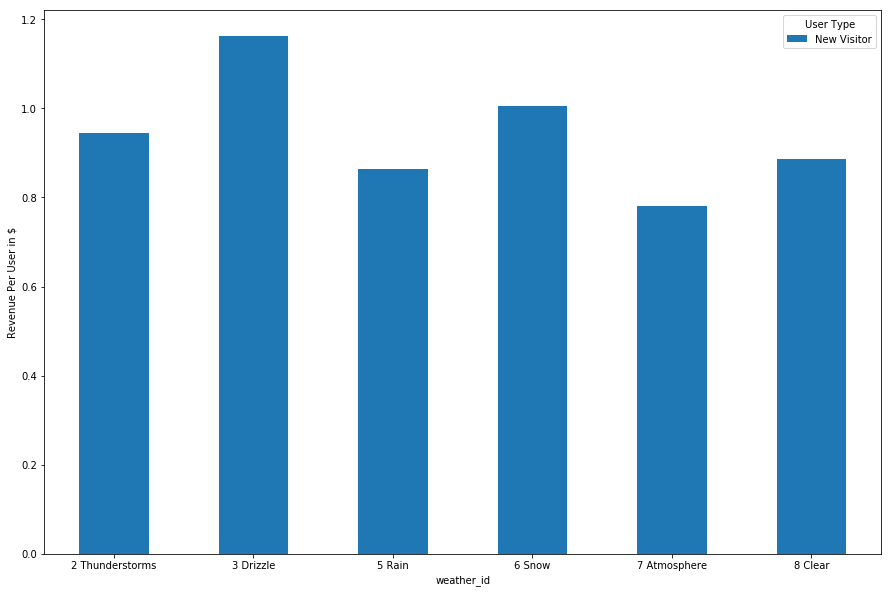

In [33]:
# Average Revenue per customer 
d = df4.transpose().plot.bar()
plt.ylabel('Revenue Per User in $')
plt.xticks(rotation='horizontal')



## Weather ID / Revenue per User Graph

#### This graph is for New York City, with Revenue Per User graphed against weather category from Open Weather Maps.  

Catergory 2, which is the umbrella category for thunderstorms, has the highest Ave. Revenue for returning customers.

What is curious is that Drizzle (Cat 3) has higher revenue than rain (Cat 4) I think it would be worth exploring how many of the rain category was light rain, before I stripped the trailing two digits that provides more detail about the kind of rain. It might make sense to move light rain to the drizzle bucket, and put more serious rain events (freezing, heavy, extreme rain) into the thunderstoms bucket, and see if there is further divergence.

There were also sometimes more than one weather classification in the weather table. Should examine those and see if they are expressed in a particular order (I took only the first one) and if we harvest value from both those values.

Once we remedy that and have some data that we think is accurate, we can do a 2 std. dev. above and below average and see if it might make sense to bid more during extreme weather
